<a href="https://colab.research.google.com/github/HareeshwarKarthikeyan/Strong-Language-Hate-Speech-Filter/blob/Nirav-Agarwal/model_lstm_v1_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import csv
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!pip install nltk
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df = pd.read_csv('/content/drive/My Drive/finalcleandataTraining.csv')
df.head()

,message,toxic,obscene,insult,racism,sexism
0,b'fuck you you red scumbag fuck you you red sc...,1,1,1,0,0
1,odeh is actions in the us proves that she is a...,0,0,0,1,0
2,b'clifton bristol the clifton ward also includ...,0,0,0,0,0
3,b' im not sexist but this is one seriously stu...,0,0,0,0,1
4,b'love a subtle menu sausage spatchcock tart p...,0,0,0,0,1


In [0]:
# Hyper-Parameters

MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)



In [0]:
label = ['toxic','obscene','insult','racism','sexism']

In [0]:
message = 'message'

In [0]:
def get_list(data):
    data = data.fillna("unknown")
    return data.tolist()

In [0]:
def tokenize_reshape(data):
    data = tok.texts_to_matrix(data)
    return np.reshape(data, (data.shape[0], 1, data.shape[1]))

In [0]:
x_train = get_list(df[message])


In [0]:
tok = Tokenizer(num_words=1000)
tok.fit_on_texts(x_train)

In [0]:
x_train = tokenize_reshape(x_train)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

In [17]:
model = Sequential()
model.add(LSTM(200, input_shape=(1, x_train.shape[2]), return_sequences=True))
model.add(LSTM(200, return_sequences=True))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            960800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1206      
Total params: 1,282,806
Trainable params: 1,282,806
Non-trainable params: 0
_________________________________________________________________


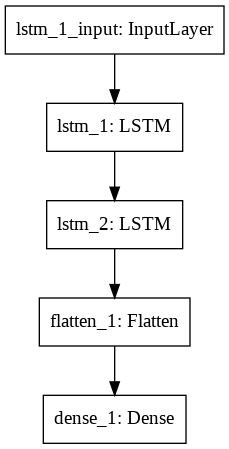

In [19]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
# for i, j in enumerate(label):
#     print("Train ",j)
#     y_train = df[j].values
#     model.fit(x_train, y_train, epochs=10)

In [0]:
# model1 = Sequential()
# model1.add(LSTM(200, input_shape=(1, x_train.shape[2]), return_sequences=True))
# model1.add(LSTM(200, return_sequences=True))
# model1.add(Flatten())
# model1.add(Dense(3, activation='softmax'))
# model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.layers import Input
from keras.models import Model
xtrain = df['message']
maxlen = 200
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1

from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('/content/drive/My Drive/Prj/glove.twitter.27B.200d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:])
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()
embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector



In [22]:
from keras.layers.embeddings import Embedding


deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(256)(embedding_layer)
dense_layer_1 = Dense(5, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
# for i, j in enumerate(label):
#     print("Train ",j)
#     y_train = df[j].values
#     model1.fit(x_train, y_train, epochs=2)
# df.head

In [24]:
# for i, j in enumerate(label):
#     # print("Train ",j)
df.head()
X_train = tokenizer.texts_to_sequences(xtrain)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
y_label = df[["toxic", "obscene", "insult", "racism", "sexism"]]
y_train = y_label.values
history = model.fit(X_train, y_train, batch_size=512, epochs=5, validation_split=0.2)



Train on 11236 samples, validate on 2810 samples
Epoch 1/5
11236/11236 [==============================] - 80s 7ms/step - loss: 0.5361 - acc: 0.8112 - val_loss: 0.4650 - val_acc: 0.8173
Epoch 2/5
11236/11236 [==============================] - 78s 7ms/step - loss: 0.4686 - acc: 0.8143 - val_loss: 0.4623 - val_acc: 0.8191
Epoch 3/5
11236/11236 [==============================] - 77s 7ms/step - loss: 0.4664 - acc: 0.8155 - val_loss: 0.4594 - val_acc: 0.8199
Epoch 4/5
11236/11236 [==============================] - 78s 7ms/step - loss: 0.4647 - acc: 0.8157 - val_loss: 0.4532 - val_acc: 0.8195
Epoch 5/5
11236/11236 [==============================] - 77s 7ms/step - loss: 0.4672 - acc: 0.8116 - val_loss: 0.4656 - val_acc: 0.8181


In [25]:

# Time to test
# Fingers crossed
test = pd.read_csv('data_test_clean.csv')
test.head()

test = test.drop(['Unnamed: 0', 'id'], axis=1)
test = test.rename(columns={"clean_comment": "message", "":"racism", "":"sexism"})

FileNotFoundError: ignored

In [0]:
xtest = get_list(test[message])

xtest = tokenize_reshape(xtest)

# tk = Tokenizer()
# tk.fit_on_texts(test[message])
# index_list = tk.texts_to_sequences(test[message])
# xtest = pad_sequences(index_list, maxlen=maxlen)

In [0]:
result = np.zeros((len(xtest), len(label)))
for i, j in enumerate(label):
    print("Train ",j)
    y_train = df[j].values
    ytest = test[j].values
    history = model.fit(x_train, y_train, epochs=10, batch_size = 512, verbose=0)
    model.evaluate(xtest, ytest, batch_size=512)
    model.predict(xtest, batch_size=512)

In [0]:
# result = pd.DataFrame(result, columns=label)    
# submission = pd.concat([ result], axis=1)
# submission.to_csv(r'final.csv', index=False)